In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/zohreh/Desktop/NSL_KDD_3.csv')
print(df)


        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           udp     other   SF        146          0     0   
1              0           tcp   private   S0          0          0     0   
2              0           tcp      http   SF        232       8153     0   
3              0           tcp      http   SF        199        420     0   
4              0           tcp   private  REJ          0          0     0   
...          ...           ...       ...  ...        ...        ...   ...   
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0          

In [3]:
#preprocessing

In [4]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Calculate the total count of null values
total_null_values = missing_values.sum()

# Print the missing values count in each column
print("Missing values in each column:")
print(missing_values)

# Print the total count of null values
print("Total count of null values:", total_null_values)


Missing values in each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rat

In [4]:
df['class'] = df['class'].replace({'normal': 0, 'anomaly': 1})

In [5]:
print(df['class'])

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: class, Length: 125972, dtype: int64


In [3]:
#string to number
protocol_mapping = {'udp': 0, 'tcp': 1, 'icmp': 2}
service_mapping = {'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}
flag_mapping = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'SH': 4, 'RSTO': 5, 'S1': 6, 'RSTOS0': 7, 'S3': 8, 'S2': 9, 'OTH': 10}
df['protocol_type'] = df['protocol_type'].map(protocol_mapping)
df['service'] = df['service'].map(service_mapping)
df['flag'] = df['flag'].map(flag_mapping)


In [6]:
print(df['class'])

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: class, Length: 125972, dtype: int64


In [7]:
print(df)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              0        0     0        146          0     0   
1              0              1        1     1          0          0     0   
2              0              1        2     0        232       8153     0   
3              0              1        2     0        199        420     0   
4              0              1        1     2          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1        1     1          0          0     0   
125968         8              0        1     0        105        145     0   
125969         0              1       15     0       2231        384     0   
125970         0              1       35     1          0          0     0   
125971         0              1        4     0        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf = RandomForestClassifier()
# آموزش مدل Random Forest
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_features:
    print(f"ویژگی: {feature}، اهمیت: {importance}")


In [7]:
print(df['protocol_type'])

0         0
1         1
2         1
3         1
4         1
         ..
125967    1
125968    0
125969    1
125970    1
125971    1
Name: protocol_type, Length: 125972, dtype: int64


In [6]:
print(df['class'])

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: class, Length: 125972, dtype: int64


In [8]:
new_df=df

In [9]:
print(new_df)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              0        0     0        146          0     0   
1              0              1        1     1          0          0     0   
2              0              1        2     0        232       8153     0   
3              0              1        2     0        199        420     0   
4              0              1        1     2          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1        1     1          0          0     0   
125968         8              0        1     0        105        145     0   
125969         0              1       15     0       2231        384     0   
125970         0              1       35     1          0          0     0   
125971         0              1        4     0        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \

In [10]:
#min max Scaler 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
df_scale= pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)


In [11]:
print(new_df)

        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              0        0     0        146          0     0   
1              0              1        1     1          0          0     0   
2              0              1        2     0        232       8153     0   
3              0              1        2     0        199        420     0   
4              0              1        1     2          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1        1     1          0          0     0   
125968         8              0        1     0        105        145     0   
125969         0              1       15     0       2231        384     0   
125970         0              1       35     1          0          0     0   
125971         0              1        4     0        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()[['class']]
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation with Class')
plt.show()



In [12]:
df.to_csv('C:/Users/zohreh/Desktop/new1_df.csv', index=False)


In [15]:
X = df_scale.drop('class', axis=1)
y = df_scale['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#step1
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
Dt_pred = DecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, Dt_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9970629093074023


In [17]:
#step2
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
gaussian_nb = GaussianNB()
# Train the classifier on the training data
gaussian_nb.fit(X_train, y_train)
# Make predictions on the test data
G_nb_pred = gaussian_nb.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, G_nb_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8887080769994047


In [29]:
#step3
#svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm = SVC()
# Train the classifier on the training data
svm.fit(X_train, y_train)
# Make predictions on the test data
svm_pred = svm.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.983012502480651


In [19]:
#step4
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create a KNN classifier
knn = KNeighborsClassifier()
# Train the classifier on the training data
knn.fit(X_train, y_train)
# Make predictions on the test data
KNN_pred = knn.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, KNN_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9951577693986902


In [20]:
# Backpropagation
Backpropagation = MLPClassifier()
Backpropagation.fit(X_train, y_train)
BP_pred = Backpropagation.predict(X_test)
BP_accuracy = accuracy_score(y_test, BP_pred)
print("Accuracy:", BP_accuracy)

Accuracy: 0.9961103393530463


In [30]:
#soal2
from sklearn.metrics import confusion_matrix
confusion_matrix_DT = confusion_matrix(y_test, Dt_pred)
confusion_matrix_GN = confusion_matrix(y_test, G_nb_pred)
confusion_matrix_KNN = confusion_matrix(y_test, KNN_pred)
confusion_matrix_SVM = confusion_matrix(y_test, svm_pred)
confusion_matrix_BP= confusion_matrix(y_test, BP_pred)

confusion_matrix_DT_df = pd.DataFrame(confusion_matrix_DT, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_GN_df = pd.DataFrame(confusion_matrix_GN, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_KNN_df = pd.DataFrame(confusion_matrix_KNN, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_SVM_df = pd.DataFrame(confusion_matrix_SVM, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_BP_df = pd.DataFrame(confusion_matrix_BP, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

print("Confusion Matrix for each model:")
print("---------------------------\nDT:")
print(confusion_matrix_DT_df)
print("---------------------------\nGN:")
print(confusion_matrix_GN_df)
print("---------------------------\nKNN:")
print(confusion_matrix_KNN_df)
print("---------------------------\nSVM:")
print(confusion_matrix_SVM_df)
print("---------------------------\nBP:")
print(confusion_matrix_BP_df)

Confusion Matrix for each model:
---------------------------
DT:
        Predicted 0  Predicted 1
True 0        13352           34
True 1           40        11769
---------------------------
GN:
        Predicted 0  Predicted 1
True 0        11474         1912
True 1          892        10917
---------------------------
KNN:
        Predicted 0  Predicted 1
True 0        13324           62
True 1           60        11749
---------------------------
SVM:
        Predicted 0  Predicted 1
True 0        13244          142
True 1          286        11523
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13341           45
True 1           53        11756


In [22]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

Results for Decision Tree:
----------------------------
Accuracy: 0.9970629093074023
Precision: 0.9971193764297213
Recall: 0.9966127529850114
F1 Score: 0.9968660003388108
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13386
         1.0       1.00      1.00      1.00     11809

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

AUC: 0.9972051985815316


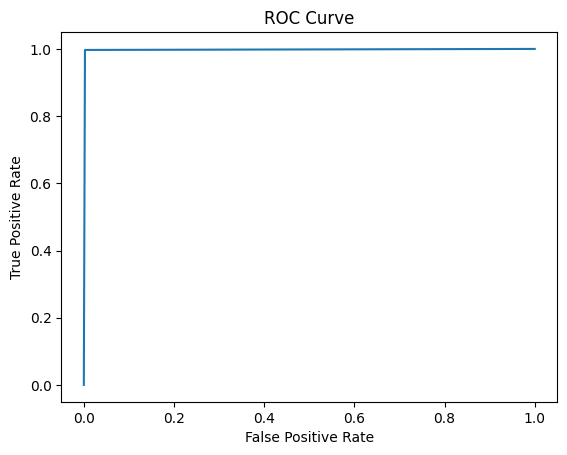

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
print("Results for Decision Tree:")
print("----------------------------")

# محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test, Dt_pred)
precision = precision_score(y_test, Dt_pred)
recall = recall_score(y_test, Dt_pred)
f1 = f1_score(y_test, Dt_pred)
classification_report = classification_report(y_test, Dt_pred)

# محاسبه منحنی ROC
proba = DecisionTree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# چاپ نتایج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


Results for GaussianNB :
----------------------------
Accuracy: 0.8887080769994047
Precision: 0.8509626627172812
Recall: 0.9244643915657549
F1 Score: 0.8861920610439159
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     13386
         1.0       0.85      0.92      0.89     11809

    accuracy                           0.89     25195
   macro avg       0.89      0.89      0.89     25195
weighted avg       0.89      0.89      0.89     25195

AUC: 0.9512832569880602


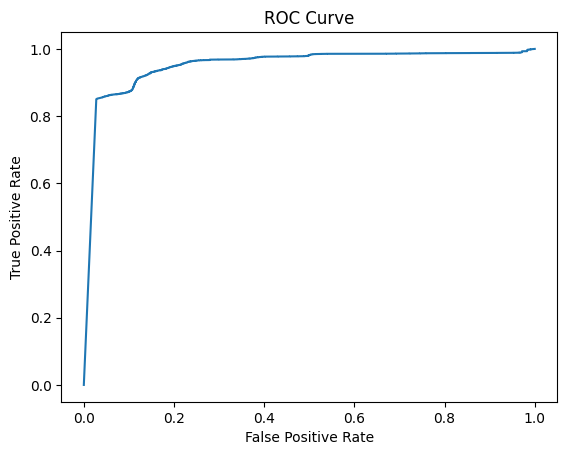

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
#Gaussian Naive Bayes
print("Results for GaussianNB :")
print("----------------------------")
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
# محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test,G_nb_pred)
precision = precision_score(y_test, G_nb_pred)
recall = recall_score(y_test, G_nb_pred)
f1 = f1_score(y_test, G_nb_pred)
classification_report = classification_report(y_test, G_nb_pred)

# محاسبه منحنی ROC
proba = gaussian_nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# چاپ نتایج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

 result for Support Vector Machine (SVM) Classification: 
Accuracy: 0.983012502480651
Precision: 0.9878268324046292
Recall: 0.9757811838428317
F1 Score: 0.9817670614296669
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     13386
         1.0       0.99      0.98      0.98     11809

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195

AUC: 0.9982519973364082


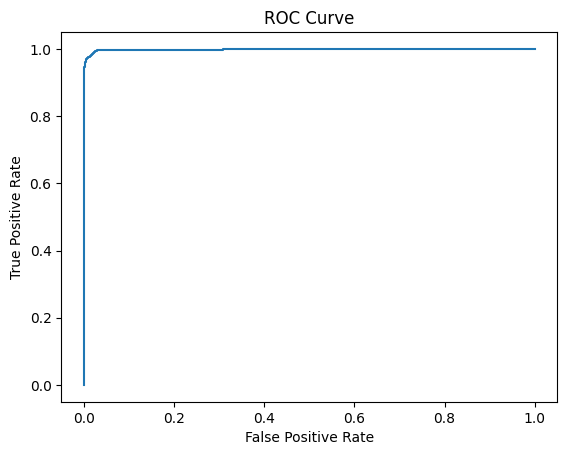

In [31]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
print(" result for Support Vector Machine (SVM) Classification: ")

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)

# Calculate the precision of the classifier
precision = precision_score(y_test, svm_pred)

# Calculate the recall of the classifier
recall = recall_score(y_test, svm_pred)

# Calculate the F1 score of the classifier
f1 = f1_score(y_test, svm_pred)

# Calculate the classification report
classification_report = classification_report(y_test, svm_pred)

# Calculate the probabilities for ROC curve
proba = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


 result for KNN Classification: 
Accuracy: 0.9951577693986902
Precision: 0.994750656167979
Recall: 0.9949191294775172
F1-Score: 0.9948348856900932
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13386
         1.0       0.99      0.99      0.99     11809

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

ROC_ACU: 0.9951437123556718


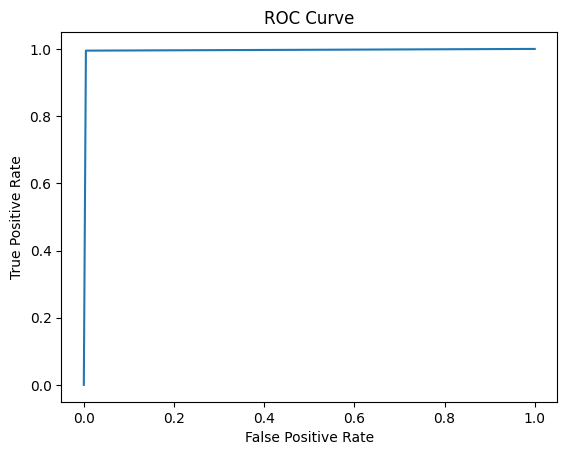

In [25]:
#kNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print(" result for KNN Classification: ")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, KNN_pred)
precision = precision_score(y_test, KNN_pred)
recall = recall_score(y_test, KNN_pred)
f1 = f1_score(y_test, KNN_pred)
classification_rep = classification_report(y_test, KNN_pred)

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, KNN_pred)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:\n", classification_rep)
print("ROC_ACU:",roc_auc)
# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

 result for Backpropagation: 
Accuracy: 0.9869815439571343
F1 Score: 0.9860044376173408
Precision Score: 0.9937215102778016
Recall Score: 0.9784063002794479
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13386
           1       0.99      0.98      0.99     11809

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195

AUC Score: 0.9993595234887905


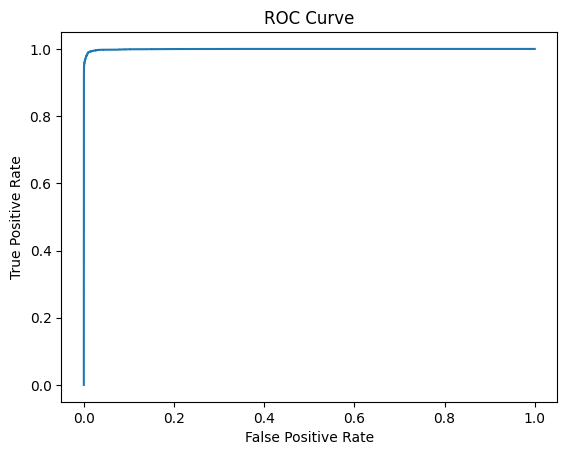

In [24]:
#Backpropagation
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
print(" result for Backpropagation: ")
# Calculate the Precision score
precision_score = precision_score(y_test, BP_pred)

# Calculate the Recall score
recall_score = recall_score(y_test, BP_pred)
f1_score = f1_score(y_test, BP_pred)

# Generate the classification report
classification_report = classification_report(y_test, BP_pred)

# Calculate the probabilities for the positive class
y_pred_proba = Backpropagation.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", BP_accuracy)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)
print("F1 Score:", f1_score)
print("Classification Report:\n", classification_report)
print("AUC Score:", auc_score)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [55]:
#PCA:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df_scale.drop('class', axis=1)
y = df_scale['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [56]:
#step1
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_pca, y_train)
Dt_pred = DecisionTree.predict(X_test_pca)
accuracy = accuracy_score(y_test, Dt_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9950783885691605


In [57]:
#step2
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes classifier
gaussian_nb = GaussianNB()
# Train the classifier on the training data
gaussian_nb.fit(X_train_pca, y_train)
# Make predictions on the test data
G_nb_pred = gaussian_nb.predict(X_test_pca)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, G_nb_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8830323476880333


In [58]:
#step3
#svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM classifier
svm = SVC()
# Train the classifier on the training data
svm.fit(X_train_pca, y_train)
# Make predictions on the test data
svm_pred = svm.predict(X_test_pca)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9841635245088312


In [59]:
#step4
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create a KNN classifier
knn = KNeighborsClassifier()
# Train the classifier on the training data
knn.fit(X_train_pca, y_train)
# Make predictions on the test data
KNN_pred = knn.predict(X_test_pca)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, KNN_pred)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9961897201825759


In [60]:
# Backpropagation
Backpropagation = MLPClassifier()
Backpropagation.fit(X_train_pca, y_train)
BP_pred = Backpropagation.predict(X_test_pca)
BP_accuracy = accuracy_score(y_test, BP_pred)
print("Accuracy:", BP_accuracy)

Accuracy: 0.9924588211946815


In [61]:
#soal2
from sklearn.metrics import confusion_matrix
confusion_matrix_DT = confusion_matrix(y_test, Dt_pred)
confusion_matrix_GN = confusion_matrix(y_test, G_nb_pred)
confusion_matrix_KNN = confusion_matrix(y_test, KNN_pred)
confusion_matrix_SVM = confusion_matrix(y_test, svm_pred)
confusion_matrix_BP= confusion_matrix(y_test, BP_pred)

confusion_matrix_DT_df = pd.DataFrame(confusion_matrix_DT, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_GN_df = pd.DataFrame(confusion_matrix_GN, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_KNN_df = pd.DataFrame(confusion_matrix_KNN, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_SVM_df = pd.DataFrame(confusion_matrix_SVM, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
confusion_matrix_BP_df = pd.DataFrame(confusion_matrix_BP, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

print("Confusion Matrix for each model:")
print("---------------------------\nDT:")
print(confusion_matrix_DT_df)
print("---------------------------\nGN:")
print(confusion_matrix_GN_df)
print("---------------------------\nKNN:")
print(confusion_matrix_KNN_df)
print("---------------------------\nSVM:")
print(confusion_matrix_SVM_df)
print("---------------------------\nBP:")
print(confusion_matrix_BP_df)

Confusion Matrix for each model:
---------------------------
DT:
        Predicted 0  Predicted 1
True 0        13332           54
True 1           70        11739
---------------------------
GN:
        Predicted 0  Predicted 1
True 0        10812         2574
True 1          373        11436
---------------------------
KNN:
        Predicted 0  Predicted 1
True 0        13342           44
True 1           52        11757
---------------------------
SVM:
        Predicted 0  Predicted 1
True 0        13234          152
True 1          247        11562
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13253          133
True 1           57        11752


Results for Decision Tree:
----------------------------
Accuracy: 0.9950783885691605
Precision: 0.9954210124650216
Recall: 0.99407231772377
F1 Score: 0.994746207948479
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     13386
         1.0       1.00      0.99      0.99     11809

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

AUC: 0.9950610745106158


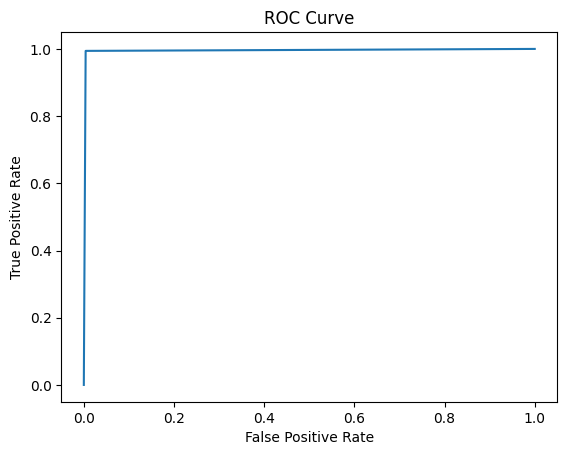

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
print("Results for Decision Tree:")
print("----------------------------")

# محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test, Dt_pred)
precision = precision_score(y_test, Dt_pred)
recall = recall_score(y_test, Dt_pred)
f1 = f1_score(y_test, Dt_pred)
classification_report = classification_report(y_test, Dt_pred)

# محاسبه منحنی ROC
proba = DecisionTree.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# چاپ نتایج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Results for GaussianNB :
----------------------------
Accuracy: 0.8830323476880333
Precision: 0.8162740899357601
Recall: 0.9684139215852317
F1 Score: 0.8858592509392308
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.81      0.88     13386
         1.0       0.82      0.97      0.89     11809

    accuracy                           0.88     25195
   macro avg       0.89      0.89      0.88     25195
weighted avg       0.90      0.88      0.88     25195

AUC: 0.9680278997966499


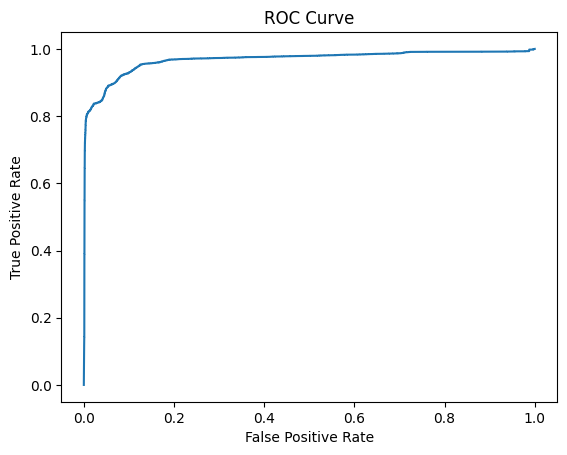

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
#Gaussian Naive Bayes
print("Results for GaussianNB :")
print("----------------------------")
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
# محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test,G_nb_pred)
precision = precision_score(y_test, G_nb_pred)
recall = recall_score(y_test, G_nb_pred)
f1 = f1_score(y_test, G_nb_pred)
classification_report = classification_report(y_test, G_nb_pred)

# محاسبه منحنی ROC
proba = gaussian_nb.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# چاپ نتایج
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

 result for Support Vector Machine (SVM) Classification: 
Accuracy: 0.9841635245088312
Precision: 0.9870240737578966
Recall: 0.9790837496824456
F1 Score: 0.9830378778217065
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     13386
         1.0       0.99      0.98      0.98     11809

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195

AUC: 0.9977155630298006


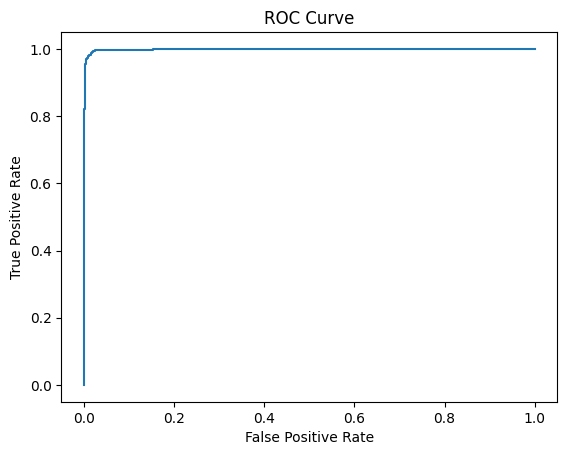

In [64]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
print(" result for Support Vector Machine (SVM) Classification: ")

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, svm_pred)

# Calculate the precision of the classifier
precision = precision_score(y_test, svm_pred)

# Calculate the recall of the classifier
recall = recall_score(y_test, svm_pred)

# Calculate the F1 score of the classifier
f1 = f1_score(y_test, svm_pred)

# Calculate the classification report
classification_report = classification_report(y_test, svm_pred)

# Calculate the probabilities for ROC curve
proba = svm.decision_function(X_test_pca)
fpr, tpr, thresholds = roc_curve(y_test, proba)
auc = roc_auc_score(y_test, proba)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report)
print("AUC:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


 result for KNN Classification: 
Accuracy: 0.9961897201825759
Precision: 0.9962715024150496
Recall: 0.9955965788805149
F1-Score: 0.9959339263024143
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13386
         1.0       1.00      1.00      1.00     11809

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

ROC_ACU: 0.9961547812974216


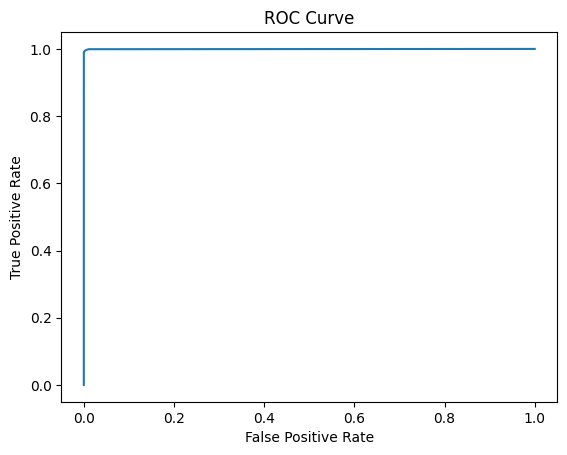

In [71]:
#kNN
from sklearn.metrics import roc_auc_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print(" result for KNN Classification: ")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, KNN_pred)
precision = precision_score(y_test, KNN_pred)
recall = recall_score(y_test, KNN_pred)
f1 = f1_score(y_test, KNN_pred)
classification_rep = classification_report(y_test, KNN_pred)


# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, KNN_pred)
roc_auc = auc(fpr, tpr)
proba = knn.predict_proba(X_test_pca)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])
auc = roc_auc_score(y_test, proba[:, 1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:\n", classification_rep)
print("ROC_ACU:",roc_auc)
# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

 result for Backpropagation: 
Accuracy: 0.9924588211946815
Precision Score: 0.9888094236432478
Recall Score: 0.9951731730036413
F1 Score: 0.9919810922596438
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13386
         1.0       0.99      1.00      0.99     11809

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195

AUC Score: 0.9994920584480531


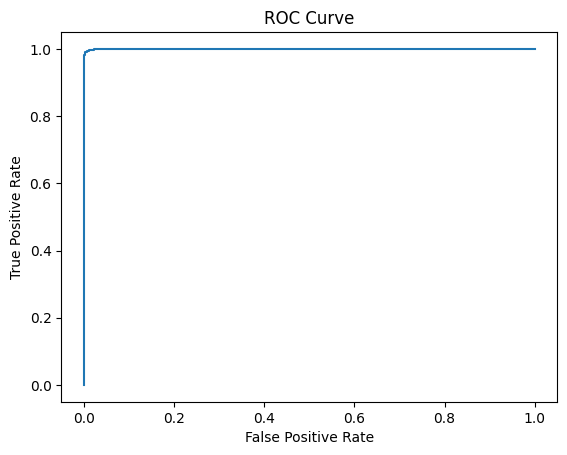

In [68]:
#Backpropagation
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
print(" result for Backpropagation: ")
# Calculate the Precision score
precision_score = precision_score(y_test, BP_pred)

# Calculate the Recall score
recall_score = recall_score(y_test, BP_pred)
f1_score = f1_score(y_test, BP_pred)

# Generate the classification report
classification_report = classification_report(y_test, BP_pred)

# Calculate the probabilities for the positive class
y_pred_proba = Backpropagation.predict_proba(X_test_pca)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", BP_accuracy)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)
print("F1 Score:", f1_score)
print("Classification Report:\n", classification_report)
print("AUC Score:", auc_score)

# نمایش منحنی ROC
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [85]:
import time
from sklearn.neural_network import MLPClassifier

# Create a Backpropagation classifier
backpropagation = MLPClassifier()

# Start the timer
start_time = time.time()

# Train the classifier on the training data
backpropagation.fit(X_train, y_train)

# Make predictions on the test data
BP_pred = backpropagation.predict(X_test)
# Calculate the execution time
execution_time = time.time() - start_time

print("Execution Time For Backpropagation after preprocessing:", execution_time, "seconds")


Execution Time For Backpropagation after preprocessing: 132.42844462394714 seconds


In [83]:
import time
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()
# Start the timer
start_time = time.time()
# Train the classifier on the training data
gaussian_nb.fit(X_train, y_train)
# Make predictions on the test data
G_nb_pred = gaussian_nb.predict(X_test)
# Calculate the execution time
execution_time = time.time() - start_time
# Print the execution time
print("Execution Time For GaussianNB after preprocessing::", execution_time, "seconds")


Execution Time For GaussianNB after preprocessing:: 0.16947603225708008 seconds


In [84]:
import time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start_time = time.time()
knn.fit(X_train, y_train)
# Make predictions on the test data
KNN_pred = knn.predict(X_test)
# Calculate the execution time
execution_time = time.time() - start_time
# Print the execution time
print("Execution Time For KNN after preprocessing:", execution_time, "seconds")


Execution Time For KNN after preprocessing: 7.621863842010498 seconds


In [79]:
import time
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
# Start the timer
start_time = time.time()
# Train the classifier on the training data
decision_tree.fit(X_train, y_train)
# Make predictions on the test data
Dt_pred = decision_tree.predict(X_test)
# Calculate the execution time
execution_time = time.time() - start_time
# Print the execution time
print("Execution Time For decision_tree after preprocessing:", execution_time, "seconds")


Execution Time For decision_tree after preprocessing: 0.6880438327789307 seconds


In [86]:
import time
from sklearn.svm import SVC
# Create an SVM classifier
svm = SVC()
# Start the timer
start_time = time.time()
# Train the classifier on the training data
svm.fit(X_train, y_train)
# Make predictions on the test data
svm_pred = svm.predict(X_test)
# Calculate the execution time
execution_time = time.time() - start_time
# Print the execution time
print("Execution Time For SVM after preprocessing:", execution_time, "seconds")


Execution Time For SVM after preprocessing: 79.69549560546875 seconds


In [87]:
import numpy as np
from scipy.spatial import distance_matrix

# Create a sample dataset
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Compute the distance matrix
dist_matrix = distance_matrix(data, data)

# Print the distance matrix
print(dist_matrix)

[[0.         2.82842712 5.65685425 8.48528137]
 [2.82842712 0.         2.82842712 5.65685425]
 [5.65685425 2.82842712 0.         2.82842712]
 [8.48528137 5.65685425 2.82842712 0.        ]]
